In [1]:
%%capture
import warnings
warnings.filterwarnings("ignore")

import os, numpy as ny,pandas as pn
import matplotlib.pyplot as mpl
import matplotlib
mtvl=[20,17,17,'#2554C7']
mt_ft=['axes.labelsize','xtick.labelsize','ytick.labelsize','text.color']
for f in range(len(mtvl)):
    matplotlib.rcParams[mt_ft[f]]=mtvl[f]
font = {'family' : 'serif',
        'size'   : 18}
matplotlib.rc('font', **font)

from sklearn import model_selection, feature_selection, utils, preprocessing, metrics, pipeline, decomposition
from sklearn import neighbors, ensemble, linear_model
import pickle

## Data Processing

In [2]:
def fdt_read():
    dnm="datafm20.csv"
    fd=pn.read_csv(dnm)
    print("Total Features: {}\nTotal Records: {}\nTotal Players in Record: {}".format(fd.shape[1],fd.shape[0],len(fd.Name.unique())))
    if "Unnamed: 0" in fd.columns:
        fd=fd.drop("Unnamed: 0",axis=1)
    else:
        pass
    return fd

In [3]:
fdata=fdt_read()
fdata.head(7)

Total Features: 64
Total Records: 24690
Total Players in Record: 23644


,Name,Position,Club,Division,Based,Nation,Height,Weight,Age,Preferred Foot,...,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc
0,Lionel Messi,"AM (RC), ST (C)",Barcelona,Spanish First Division,Spain (First Division),ARG,170,72,32,Left,...,18.0,2.0,2.0,10.0,19.0,19.0,19.0,7.0,2.0,18.0
1,Cristiano Ronaldo,"AM (RL), ST (C)",Juventus,Italian Serie A,Italy (Serie A),POR,185,83,34,Either,...,14.0,4.0,1.0,16.0,14.0,18.0,13.0,6.0,2.0,15.0
2,Kylian MbappÃ©,"AM (RL), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),FRA,178,73,20,Right,...,18.0,2.0,1.0,12.0,14.0,17.0,16.0,6.0,4.0,20.0
3,Manuel Neuer,GK,FC Bayern,Bundesliga,Germany (Bundesliga),GER,192,90,33,Either,...,20.0,12.0,17.0,14.0,14.0,19.0,15.0,8.0,14.0,13.0
4,Neymar,"M (L), AM (LC), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),BRA,175,68,27,Right,...,17.0,3.0,1.0,14.0,14.0,16.0,18.0,10.0,4.0,17.0
5,Erling Haaland,ST (C),Borussia Dortmund,Bundesliga,Germany (Bundesliga),NOR,194,87,18,Left,...,17.0,2.0,3.0,14.0,17.0,16.0,14.0,13.0,3.0,15.0
6,Kevin De Bruyne,"M (RLC), AM (C)",Man City,English Premier Division,England (Premier Division),BEL,181,70,27,Either,...,15.0,2.0,2.0,14.0,14.0,13.0,13.0,12.0,2.0,15.0


In [4]:
def fdt_info_clean(fd):
    print("++++++++++++++++++++++++++++++++++++++++++")
    print("\tInformation of Data Features: \n")
    print(fd.info())
    print("++++++++++++++++++++++++++++++++++++++++++")
    print("\n\tInformation of Data Types: \n")
    fdcat=fd.dtypes[fd.dtypes=='object'].index.tolist()
    fdnum=fd.dtypes[fd.dtypes!='object'].index.tolist()
    print("\tCategorical Features: {}\n\tNumerical Features: {}".format(len(fdcat),len(fdnum)))
    print("++++++++++++++++++++++++++++++++++++++++++")
    fdms=sum(fd.isna().sum())
    if fdms>0:
        print("Data has Missing Values\n")
        print("Cleaning...\n")
        fd=fd.dropna()
        print("Total Missing Values After Cleaning: {}".format(sum(fd.isna().sum())))
        return fd
    else:
        print("\n\tMissing Values Examined")
        print("\n\tData has no Missing Values\n")
        return fd

In [5]:
fdata=fdt_info_clean(fdata)
fdata.head(7)

++++++++++++++++++++++++++++++++++++++++++
	Information of Data Features: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24690 entries, 0 to 24689
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            24690 non-null  object 
 1   Position        24690 non-null  object 
 2   Club            24690 non-null  object 
 3   Division        24690 non-null  object 
 4   Based           24690 non-null  object 
 5   Nation          24690 non-null  object 
 6   Height          24690 non-null  int64  
 7   Weight          24690 non-null  int64  
 8   Age             24690 non-null  int64  
 9   Preferred Foot  24690 non-null  object 
 10  Best Pos        24690 non-null  object 
 11  Best Role       24690 non-null  object 
 12  Value           24690 non-null  int64  
 13  Wage            24690 non-null  int64  
 14  CA              24690 non-null  int64  
 15  PA              24690 non-null  int64  
 16  

,Name,Position,Club,Division,Based,Nation,Height,Weight,Age,Preferred Foot,...,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc
0,Lionel Messi,"AM (RC), ST (C)",Barcelona,Spanish First Division,Spain (First Division),ARG,170,72,32,Left,...,18.0,2.0,2.0,10.0,19.0,19.0,19.0,7.0,2.0,18.0
1,Cristiano Ronaldo,"AM (RL), ST (C)",Juventus,Italian Serie A,Italy (Serie A),POR,185,83,34,Either,...,14.0,4.0,1.0,16.0,14.0,18.0,13.0,6.0,2.0,15.0
2,Kylian MbappÃ©,"AM (RL), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),FRA,178,73,20,Right,...,18.0,2.0,1.0,12.0,14.0,17.0,16.0,6.0,4.0,20.0
3,Manuel Neuer,GK,FC Bayern,Bundesliga,Germany (Bundesliga),GER,192,90,33,Either,...,20.0,12.0,17.0,14.0,14.0,19.0,15.0,8.0,14.0,13.0
4,Neymar,"M (L), AM (LC), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),BRA,175,68,27,Right,...,17.0,3.0,1.0,14.0,14.0,16.0,18.0,10.0,4.0,17.0
5,Erling Haaland,ST (C),Borussia Dortmund,Bundesliga,Germany (Bundesliga),NOR,194,87,18,Left,...,17.0,2.0,3.0,14.0,17.0,16.0,14.0,13.0,3.0,15.0
6,Kevin De Bruyne,"M (RLC), AM (C)",Man City,English Premier Division,England (Premier Division),BEL,181,70,27,Either,...,15.0,2.0,2.0,14.0,14.0,13.0,13.0,12.0,2.0,15.0


In [6]:
def data_prep(fd):
    fdcat=fd.dtypes[fd.dtypes=='object'].index.tolist()
    fdnum=fd.dtypes[fd.dtypes!='object'].index.tolist()
    fd1=fd[fdcat]
    fd2=fd[fdnum]
    return fd1,fd2

In [7]:
fdata_cat,fdata_num=data_prep(fdata)
fdata_cat.head(7)

,Name,Position,Club,Division,Based,Nation,Preferred Foot,Best Pos,Best Role
0,Lionel Messi,"AM (RC), ST (C)",Barcelona,Spanish First Division,Spain (First Division),ARG,Left,AM (R),IF
1,Cristiano Ronaldo,"AM (RL), ST (C)",Juventus,Italian Serie A,Italy (Serie A),POR,Either,ST (C),CF
2,Kylian MbappÃ©,"AM (RL), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),FRA,Right,ST (C),AF
3,Manuel Neuer,GK,FC Bayern,Bundesliga,Germany (Bundesliga),GER,Either,GK,SK
4,Neymar,"M (L), AM (LC), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),BRA,Right,AM (L),IW
5,Erling Haaland,ST (C),Borussia Dortmund,Bundesliga,Germany (Bundesliga),NOR,Left,ST (C),AF
6,Kevin De Bruyne,"M (RLC), AM (C)",Man City,English Premier Division,England (Premier Division),BEL,Either,M (C),MEZ


In [8]:
fdata_num.head()

,Height,Weight,Age,Value,Wage,CA,PA,Wor,Vis,Thr,...,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc
0,170,72,32,73000000,1200000,195,200,7,20,2,...,18.0,2.0,2.0,10.0,19.0,19.0,19.0,7.0,2.0,18.0
1,185,83,34,31000000,950000,195,196,10,14,2,...,14.0,4.0,1.0,16.0,14.0,18.0,13.0,6.0,2.0,15.0
2,178,73,20,86000000,375000,181,196,10,13,1,...,18.0,2.0,1.0,12.0,14.0,17.0,16.0,6.0,4.0,20.0
3,192,90,33,44000000,250000,176,193,14,12,19,...,20.0,12.0,17.0,14.0,14.0,19.0,15.0,8.0,14.0,13.0
4,175,68,27,91000000,600000,186,190,10,16,1,...,17.0,3.0,1.0,14.0,14.0,16.0,18.0,10.0,4.0,17.0


## Data Visualisation

In [9]:
fdata.head()

,Name,Position,Club,Division,Based,Nation,Height,Weight,Age,Preferred Foot,...,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc
0,Lionel Messi,"AM (RC), ST (C)",Barcelona,Spanish First Division,Spain (First Division),ARG,170,72,32,Left,...,18.0,2.0,2.0,10.0,19.0,19.0,19.0,7.0,2.0,18.0
1,Cristiano Ronaldo,"AM (RL), ST (C)",Juventus,Italian Serie A,Italy (Serie A),POR,185,83,34,Either,...,14.0,4.0,1.0,16.0,14.0,18.0,13.0,6.0,2.0,15.0
2,Kylian MbappÃ©,"AM (RL), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),FRA,178,73,20,Right,...,18.0,2.0,1.0,12.0,14.0,17.0,16.0,6.0,4.0,20.0
3,Manuel Neuer,GK,FC Bayern,Bundesliga,Germany (Bundesliga),GER,192,90,33,Either,...,20.0,12.0,17.0,14.0,14.0,19.0,15.0,8.0,14.0,13.0
4,Neymar,"M (L), AM (LC), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),BRA,175,68,27,Right,...,17.0,3.0,1.0,14.0,14.0,16.0,18.0,10.0,4.0,17.0


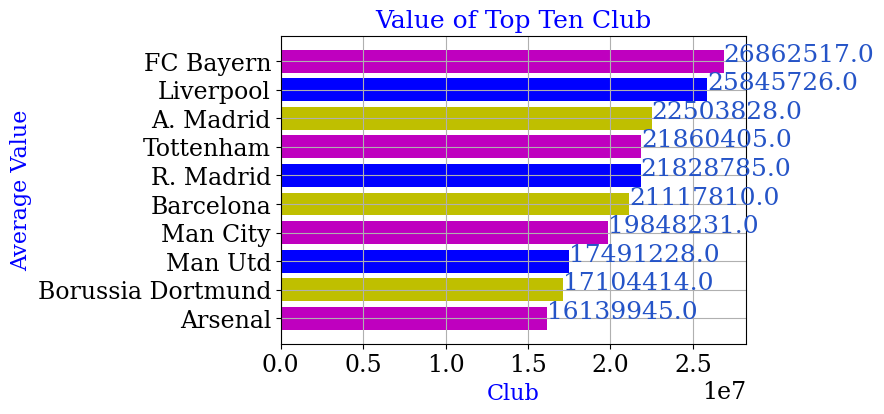

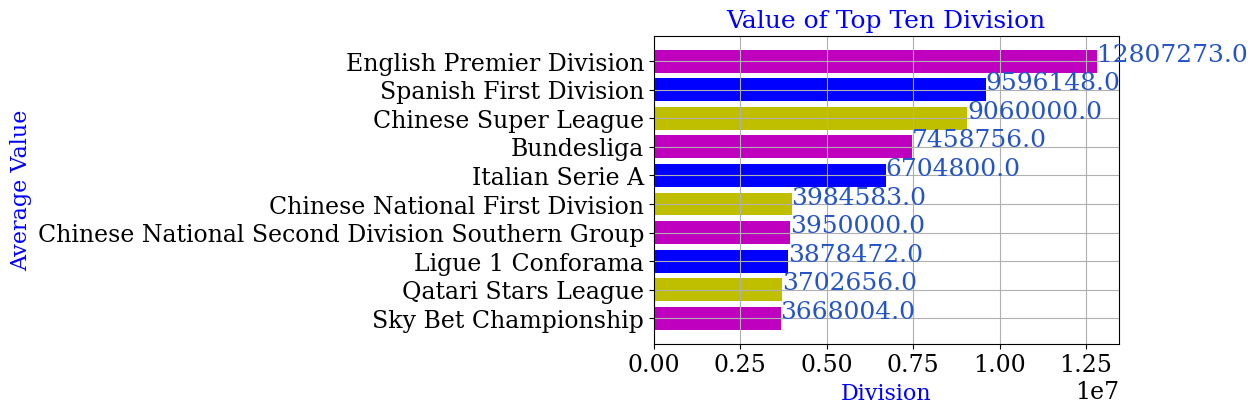

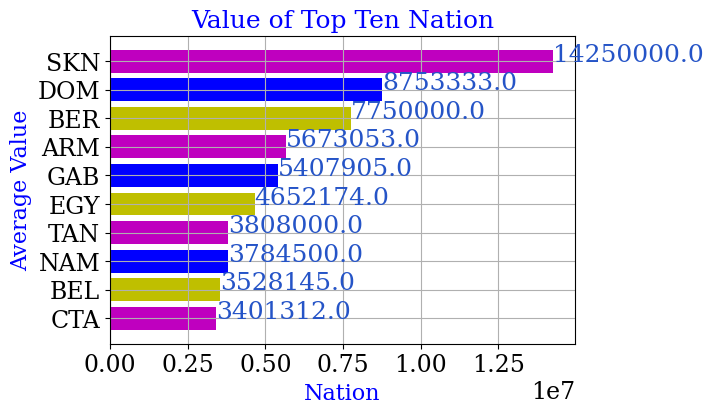

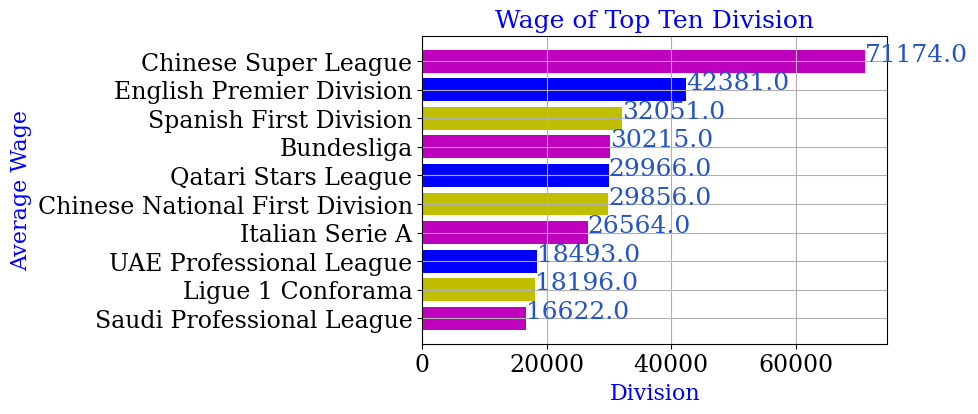

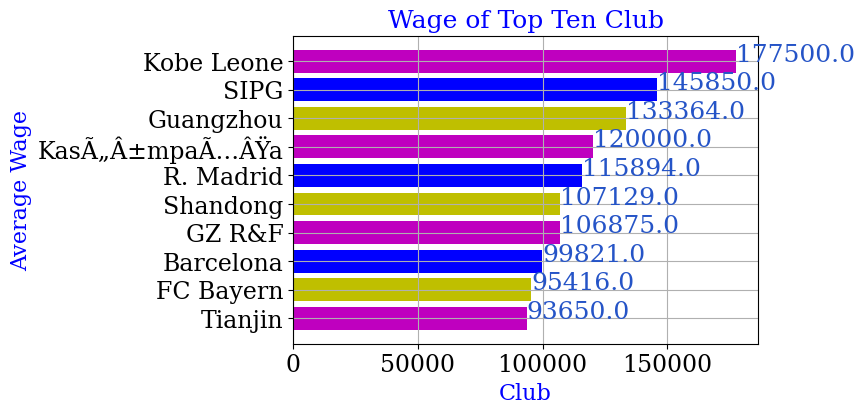

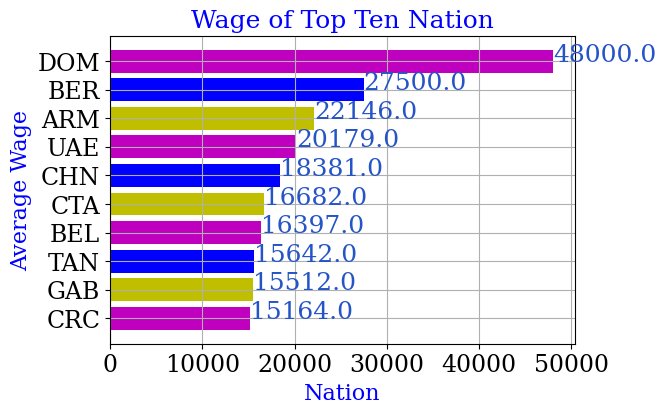

In [10]:
def fdt_vz(fd,c1,c2):
  df=fd.groupby(["{}".format(c1)]).agg({"{}".format(c2): [ny.mean]}).sort_values(by=("{}".format(c2),"mean"),ascending=False).iloc[:10]
  fet=df.index.tolist()
  val=ny.round_(df.values.flatten())
  df1=pn.DataFrame({
    "{}".format(c1):fet,
    "{}".format(c2):val
  })
  df1=df1.sort_values(by="{}".format(c2),ascending=True)
  mpl.figure(figsize=(6,4))
  mpl.title("{} of Top Ten {}".format(c2,c1),fontsize=18,color="b")
  mpl.barh(df1["{}".format(c1)],df1["{}".format(c2)],color=["m","y","b"])
  #mpl.xticks(rotation=90)
  mpl.xlabel("{}".format(c1),fontsize=16,color="b")
  mpl.ylabel("Average {}".format(c2),fontsize=16,color="b")
  for df1_id, df1_val in enumerate(df1["{}".format(c2)]):
      mpl.text(df1_val, df1_id, str(df1_val))
  mpl.grid()
  #mpl.show()
fdt_vz(fdata,"Club","Value")
fdt_vz(fdata,"Division","Value")
fdt_vz(fdata,"Nation","Value")
fdt_vz(fdata,"Division","Wage")
fdt_vz(fdata,"Club","Wage")
fdt_vz(fdata,"Nation","Wage")

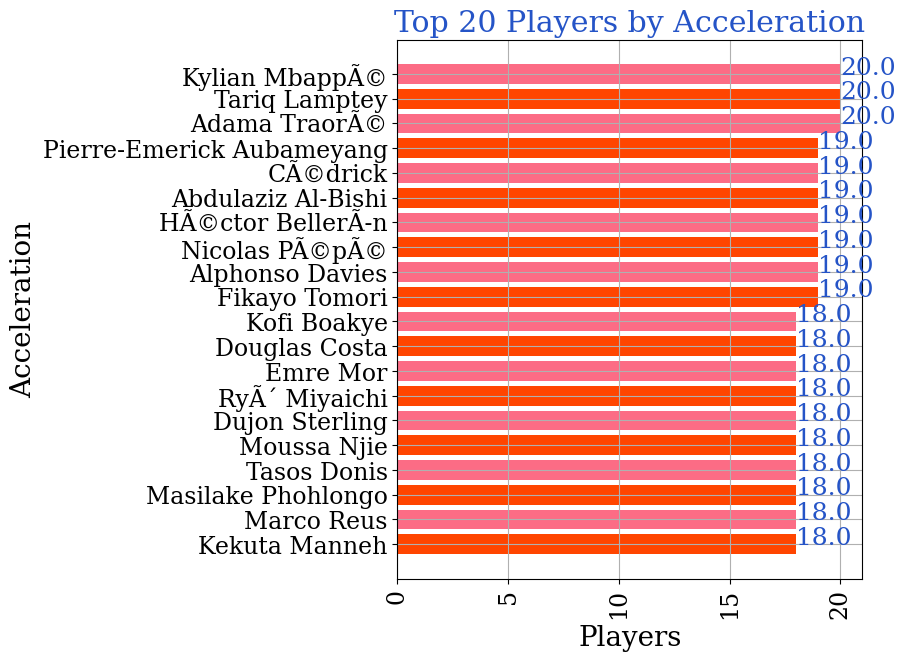

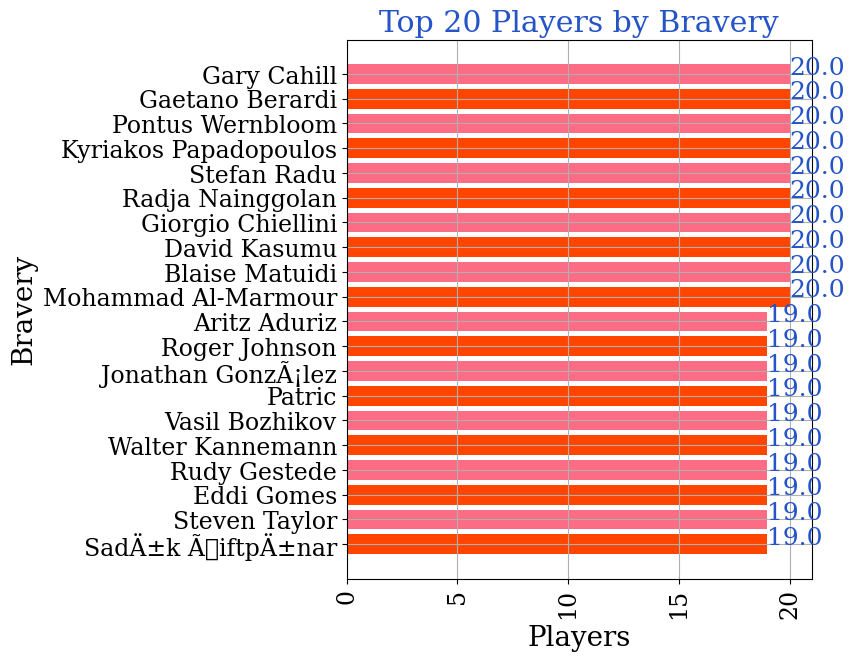

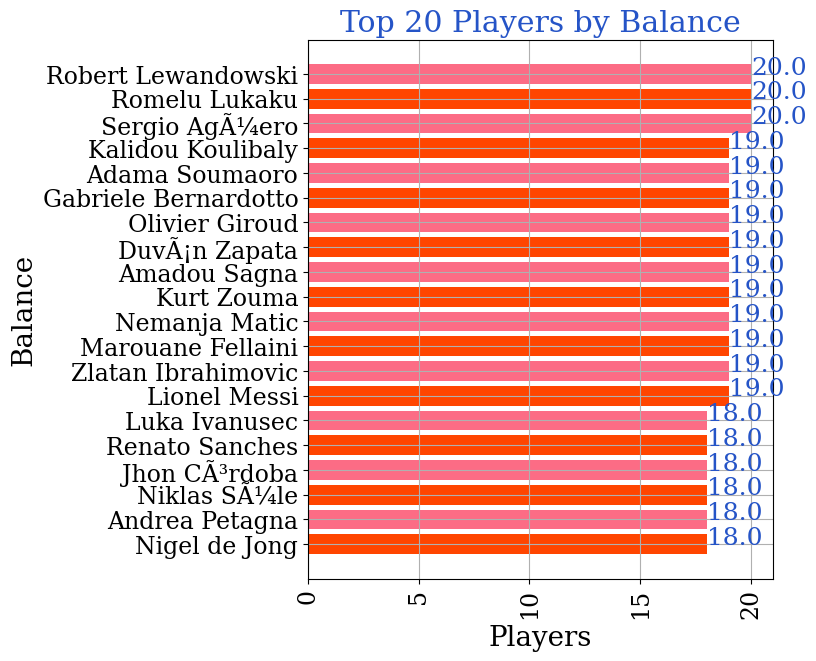

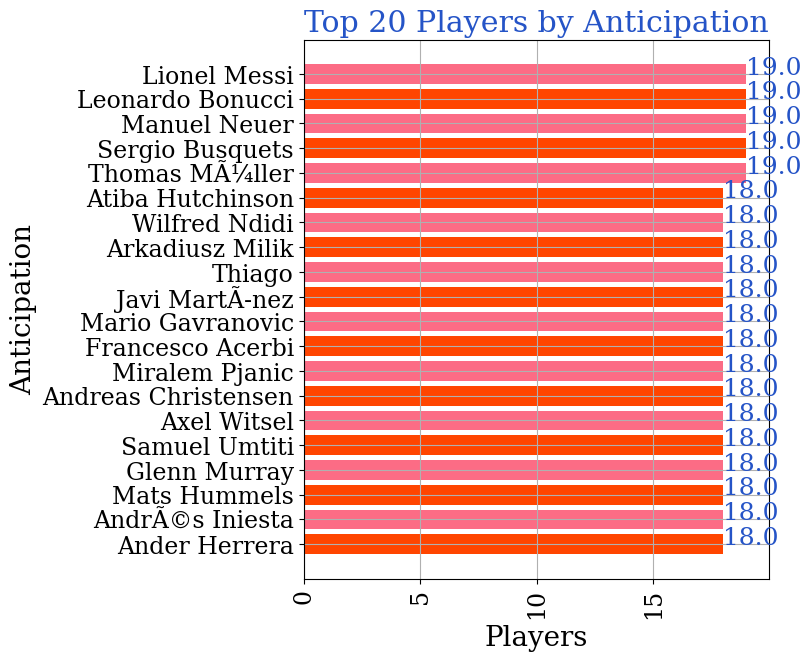

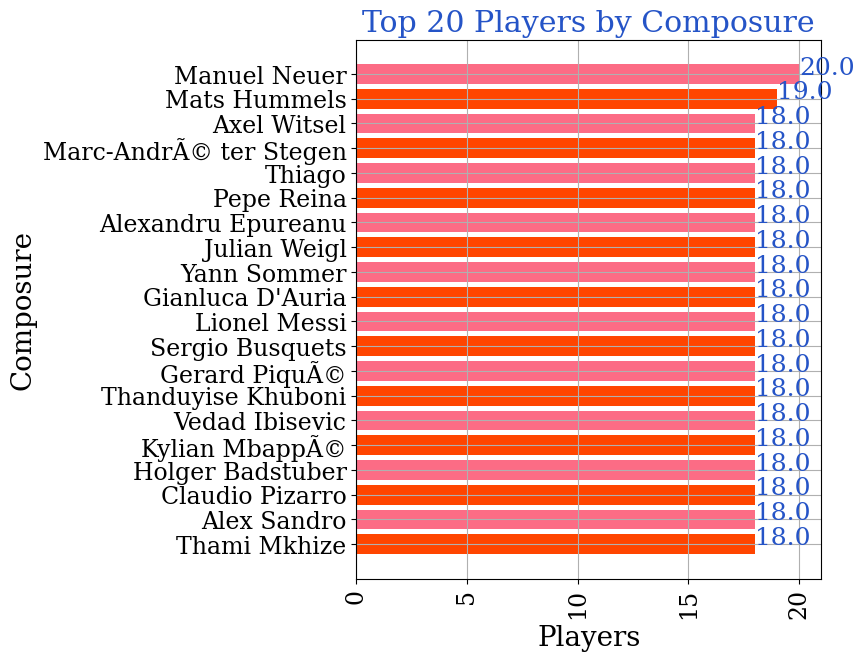

In [11]:
def fdt_vz_plyfet(fd,c1,c2,nm):
    df=fdata.groupby(["{}".format(c1),"Name"]).agg({"{}".format(c2): [ny.mean]}).sort_values(by=("{}".format(c2),"mean"),ascending=False).iloc[:20]
    dfidx=ny.array(df.index)
    topcat,topply=[],[]
    for d in dfidx:
        topcat.append(d[0])
        topply.append(d[1])
    
    df1=pn.DataFrame({
        "{}".format(c1):topcat,
        "Player":topply,
        "{}".format(c2):df.values.flatten()
    })
    mpl.figure(figsize=(6,7))
    mpl.title("Top 20 Players by {}".format(nm))
    df2=df1[::-1]
    mpl.barh(df2['Player'],df2['{}'.format(c2)],color=["#FF4500","#FC6C85"])
    mpl.xticks(rotation=90)
    mpl.xlabel("Players")
    mpl.ylabel("{}".format(nm))
    mpl.grid()
    for df2_id, df2_val in enumerate(df2['{}'.format(c2)]):
            mpl.text(df2_val, df2_id, str(df2_val))
    mpl.show()
plyfets=['Acc','Bra','Bal','Ant','Cmp']
ftnms=['Acceleration','Bravery','Balance','Anticipation','Composure']
for p in range(len(plyfets)):
    fdt_vz_plyfet(fdata,"Club",plyfets[p],ftnms[p])

## Outlier Detection and Normalization

In [12]:
def fdt_outlier(fd,n,w,h,col):
    arrfd=ny.array(fd.iloc[:,:-1])
    cm_pca = decomposition.PCA(n_components=n)
    cm_pca.fit(arrfd)
    print(cm_pca.explained_variance_ratio_)
    cmpn_pca=["Comp-{}".format(i+1) for i in range(len(cm_pca.explained_variance_ratio_.tolist()))]
    mpl.figure(figsize=(w,h))
    mpl.title("Value of PCA Component Variance(PCA={})".format(n),fontsize=18)
    mpl.bar(cmpn_pca,cm_pca.explained_variance_ratio_.tolist(),width=0.5,color=col)
    mpl.plot(cm_pca.explained_variance_ratio_.tolist(),"--kX")
    mpl.xlabel("Components",fontsize=14)
    mpl.ylabel("Variance",fontsize=14)
    mpl.grid()
    mpl.show() 
    return cm_pca.explained_variance_ratio_

In [13]:
def fdt_norm(fd):
    prepproc = preprocessing.MinMaxScaler()
    nrm_fd=prepproc.fit_transform(fd)
    return nrm_fd

### Outliers before Normalization

[9.99991616e-01 8.38386821e-06]


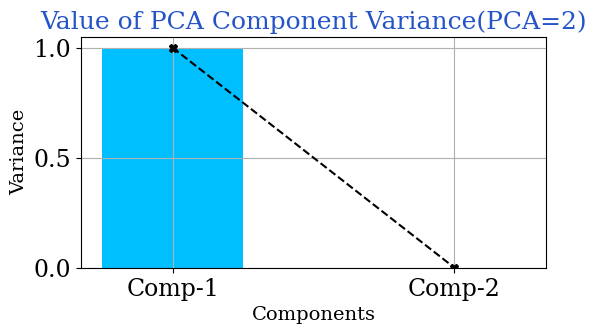

[9.99991616e-01 8.38386821e-06 9.80564840e-12 5.52741786e-12]


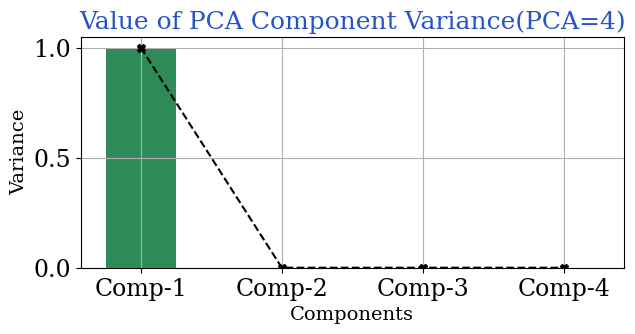

[9.99991616e-01 8.38386821e-06 9.80564840e-12 5.52741786e-12
 2.70544857e-12 2.04531314e-12]


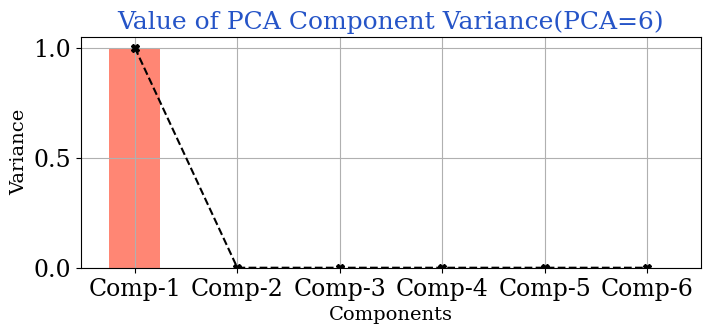

[9.99991616e-01 8.38386821e-06 9.80564840e-12 5.52741786e-12
 2.70544857e-12 2.04531314e-12 1.42937753e-12 9.51770547e-13]


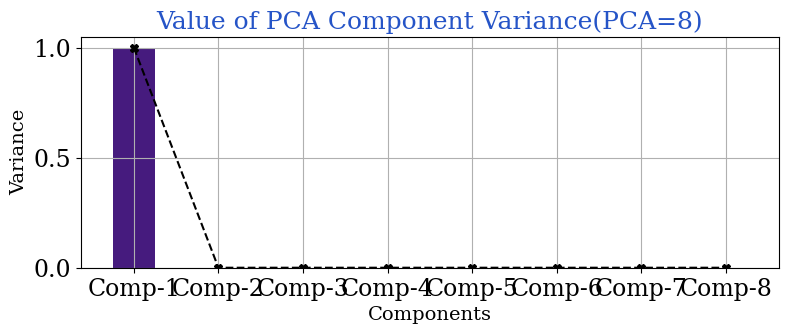

,Height,Weight,Age,Wage,CA,PA,Wor,Vis,Thr,Tec,...,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc,Value
0,0.283019,0.303571,0.514286,1.000000,1.000000,1.000000,0.315789,1.000000,0.055556,1.000000,...,0.052632,0.052632,0.473684,0.947368,1.000000,0.947368,0.315789,0.052632,0.888889,73000000
1,0.566038,0.500000,0.571429,0.791667,1.000000,0.951220,0.473684,0.684211,0.055556,0.842105,...,0.157895,0.000000,0.789474,0.684211,0.944444,0.631579,0.263158,0.052632,0.722222,31000000
2,0.433962,0.321429,0.171429,0.312500,0.927461,0.951220,0.473684,0.631579,0.000000,0.842105,...,0.052632,0.000000,0.578947,0.684211,0.888889,0.789474,0.263158,0.157895,1.000000,86000000
3,0.698113,0.625000,0.542857,0.208333,0.901554,0.914634,0.684211,0.578947,1.000000,0.578947,...,0.578947,0.842105,0.684211,0.684211,1.000000,0.736842,0.368421,0.684211,0.611111,44000000
4,0.377358,0.232143,0.371429,0.500000,0.953368,0.878049,0.473684,0.789474,0.000000,1.000000,...,0.105263,0.000000,0.684211,0.684211,0.833333,0.894737,0.473684,0.157895,0.833333,91000000
5,0.735849,0.571429,0.114286,0.112500,0.849741,0.865854,0.631579,0.631579,0.055556,0.684211,...,0.052632,0.105263,0.684211,0.842105,0.833333,0.684211,0.631579,0.105263,0.722222,67000000
6,0.490566,0.267857,0.371429,0.191667,0.963731,0.853659,0.736842,1.000000,0.111111,0.842105,...,0.052632,0.052632,0.684211,0.684211,0.666667,0.631579,0.578947,0.052632,0.722222,88000000
7,0.509434,0.553571,0.514286,0.204167,0.922280,0.853659,0.789474,0.789474,0.055556,0.842105,...,0.105263,0.000000,0.842105,0.578947,0.833333,0.684211,0.842105,0.105263,0.666667,55000000
8,0.698113,0.660714,0.771429,0.031667,0.797927,0.841463,0.578947,0.315789,0.666667,0.315789,...,1.000000,1.000000,0.842105,0.631579,0.888889,0.315789,0.210526,0.684211,0.222222,3100000
9,0.566038,0.482143,0.428571,0.437500,0.886010,0.829268,0.473684,0.631579,0.000000,0.789474,...,0.105263,0.052632,0.526316,0.631579,0.722222,0.631579,0.526316,0.052632,0.666667,75000000


In [14]:

pca_out_res=[]
pca_out_res.append(fdt_outlier(fdata_num,2,6,3,"#00BFFF"))
pca_out_res.append(fdt_outlier(fdata_num,4,7,3,"#2E8B57"))
pca_out_res.append(fdt_outlier(fdata_num,6,8,3,"#FF8674"))
pca_out_res.append(fdt_outlier(fdata_num,8,9,3,"#461B7E"))

res_out_chk=[]
status=[]
for po in pca_out_res:
    for p in po:
        if p>0.8:
            res_out_chk.append("Outlier in Component-{} with Variance Value {}".format(po.tolist().index(p)+1,round(p,5)))
            status.append(True)
if len(status)==4 and True in status:
    fdata_norm=fdt_norm(fdata_num.drop('Value',axis=1))
fdata_norm=pn.DataFrame(fdata_norm,columns=fdata_num.drop('Value',axis=1).columns.tolist())
fdata_norm['Value']=fdata_num['Value']
fdata_norm.head(10)

### Outliers After Normalization

[0.32273749 0.1506521 ]


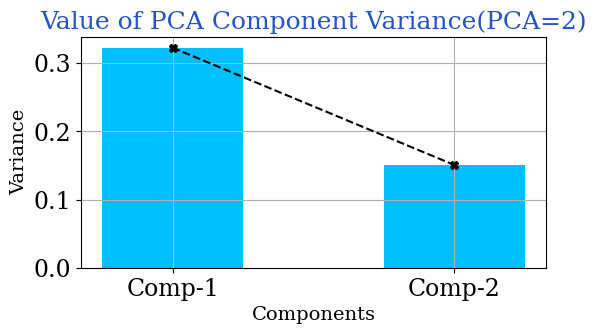

[0.32273749 0.1506521  0.11586769 0.04826482]


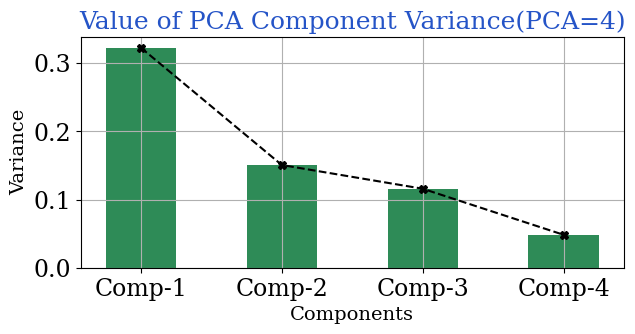

[0.32273749 0.1506521  0.11586769 0.04826482 0.03049388 0.02453853]


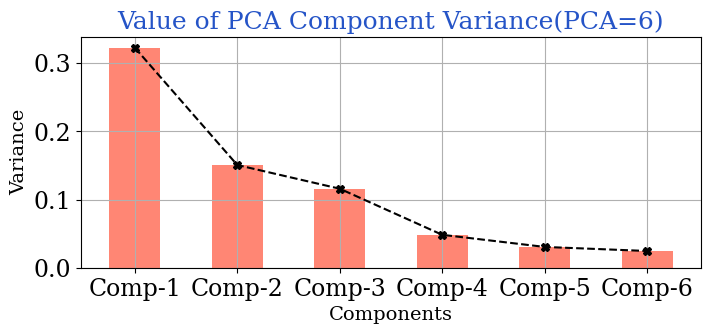

[0.32273749 0.1506521  0.11586769 0.04826475 0.03049406 0.02453869
 0.0226102  0.01877362]


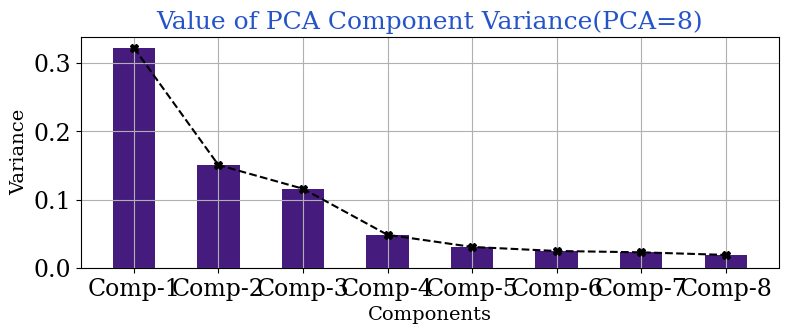

array([0.32273749, 0.1506521 , 0.11586769, 0.04826475, 0.03049406,
       0.02453869, 0.0226102 , 0.01877362])

In [15]:
fdt_outlier(fdata_norm,2,6,3,"#00BFFF")
fdt_outlier(fdata_norm,4,7,3,"#2E8B57")
fdt_outlier(fdata_norm,6,8,3,"#FF8674")
fdt_outlier(fdata_norm,8,9,3,"#461B7E")       

## Feature Selection using SelectKBest Method for top 20 features

In [16]:
def fdt_sel_fets(fd):
    fd_X=fd.drop(['Value'],axis=1)
    fd_Y=fd['Value']  
    
    kb=feature_selection.SelectKBest(feature_selection.chi2, k=20)
    kb.fit(fd_X, fd_Y)
    print("Selected Features: \n",*fd_X.columns[kb.get_support()],sep="\n")
    return fd_X.columns[kb.get_support()]

In [17]:
fdata_num.corr()

,Height,Weight,Age,Value,Wage,CA,PA,Wor,Vis,Thr,...,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc
Height,1.000000,0.776612,0.063792,0.036180,0.044225,0.068261,0.016283,-0.061371,-0.283737,0.324864,...,0.041022,0.321509,0.323711,0.259173,0.185146,0.127298,-0.329407,0.075047,0.349414,-0.368881
Weight,0.776612,1.000000,0.274713,0.057593,0.079654,0.211308,0.028308,0.042909,-0.197882,0.288647,...,0.146416,0.288603,0.288518,0.359922,0.330884,0.239700,-0.296204,0.140269,0.305487,-0.357605
Age,0.063792,0.274713,1.000000,0.035900,0.098863,0.378205,0.003138,0.239307,0.166372,0.076730,...,0.345150,0.083431,0.068409,0.368600,0.365605,0.372804,-0.094589,0.186801,0.056526,-0.255530
Value,0.036180,0.057593,0.035900,1.000000,0.745777,0.529034,0.582358,0.226684,0.228702,-0.011092,...,0.291994,-0.010398,-0.010839,0.180831,0.258573,0.290786,0.220074,0.103884,-0.013109,0.184839
Wage,0.044225,0.079654,0.098863,0.745777,1.000000,0.465673,0.519227,0.178238,0.197073,-0.001856,...,0.272400,0.002464,0.001271,0.170038,0.239785,0.275518,0.174324,0.087806,-0.002083,0.125750
CA,0.068261,0.211308,0.378205,0.529034,0.465673,1.000000,0.529750,0.505062,0.424636,0.027919,...,0.601763,0.033061,0.017732,0.458850,0.590397,0.603230,0.329789,0.208018,0.008465,0.222561
PA,0.016283,0.028308,0.003138,0.582358,0.519227,0.529750,1.000000,0.198382,0.273726,-0.002328,...,0.339855,0.003515,-0.000257,0.187958,0.261741,0.305159,0.199407,0.101057,-0.006232,0.134135
Wor,-0.061371,0.042909,0.239307,0.226684,0.178238,0.505062,0.198382,1.000000,0.298541,-0.200657,...,0.354693,-0.201498,-0.224689,0.413482,0.423868,0.354089,0.080935,0.347296,-0.228366,0.078169
Vis,-0.283737,-0.197882,0.166372,0.228702,0.197073,0.424636,0.273726,0.298541,1.000000,-0.213472,...,0.399849,-0.218352,-0.225560,-0.005258,0.224075,0.248634,0.210605,0.007353,-0.231408,0.108123
Thr,0.324864,0.288647,0.076730,-0.011092,-0.001856,0.027919,-0.002328,-0.200657,-0.213472,1.000000,...,-0.051535,0.865947,0.865351,0.147924,-0.012688,0.009065,0.026936,-0.123672,0.870123,-0.214731


In [18]:
fdata_preds=fdt_sel_fets(fdata_norm)

Selected Features: 

Age
Wage
CA
PA
Tea
Str
Sta
Ref
Pen
1v1
OtB
L Th
Lon
Han
Fla
Fin
Dri
Cro
Cmp
Bal


## Player Value Prediction

In [19]:
def fdt_split(data,prd):
  dt=utils.resample(data, replace = True, n_samples = int(len(data)), random_state = 22)
  Training=dt.iloc[:int(len(data)*0.75)]
  Testing=dt.iloc[:int(len(data)*0.25)]
  ftr_X,fts_X,ftr_Y,fts_Y=Training[prd],Testing[prd],Training['Value'],Testing['Value']
  return ftr_X,fts_X,ftr_Y,fts_Y

In [20]:
def Player_Value_Predict(predictor, FdTrX, FdTsX, FdTrY, FdTsY, model):
    model=predictor
    model.fit(FdTrX, FdTrY)
    FTB_PRD=model.predict(FdTsX)
    FTB_PRD_tr=model.predict(FdTrX)
    mse=round(metrics.mean_squared_error(FdTsY,FTB_PRD,squared=True),4)*100
    r2=round(metrics.r2_score(FdTsY,FTB_PRD),4)*100
    r2tr=round(metrics.r2_score(FdTrY,FTB_PRD_tr),4)*100
    mxe=round(metrics.max_error(FdTsY,FTB_PRD),4)*100
    mae=round(metrics.mean_absolute_error(FdTsY,FTB_PRD),4)*100
    return r2,r2tr,mse,mxe,mae

### Prediction using Models 

Executing: Random Forest
End of Execution for Random Forest
Executing: KNN
End of Execution for KNN
Executing: Ridge Regression
End of Execution for Ridge Regression


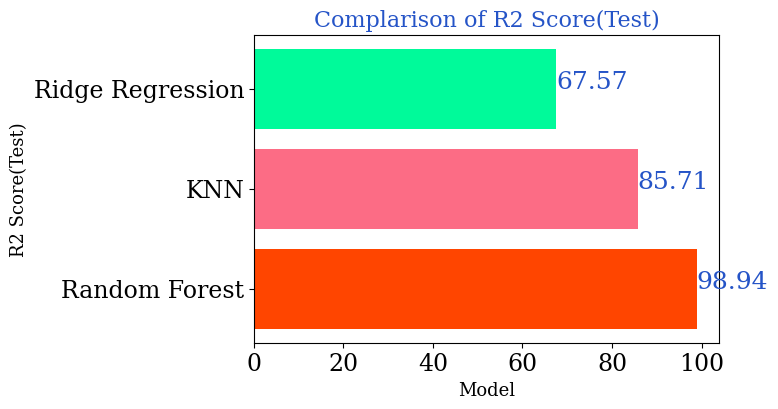

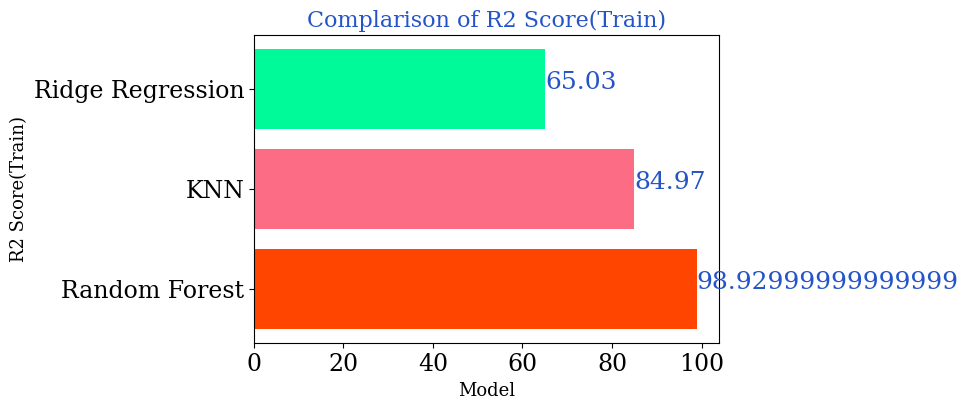

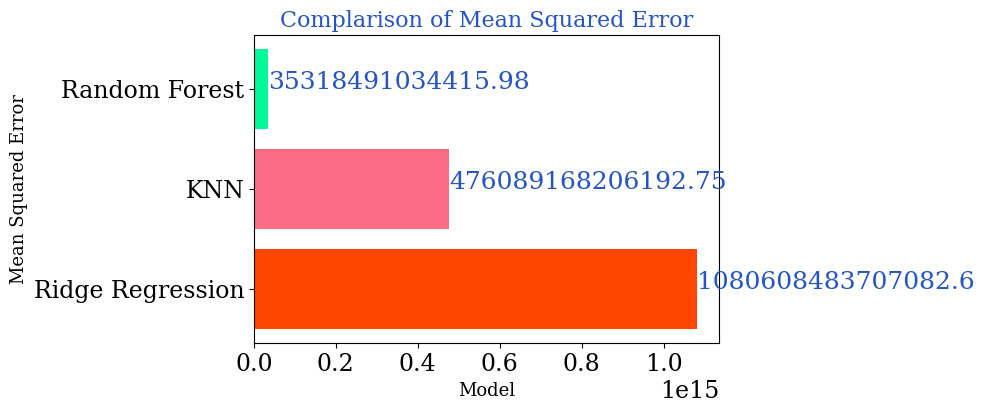

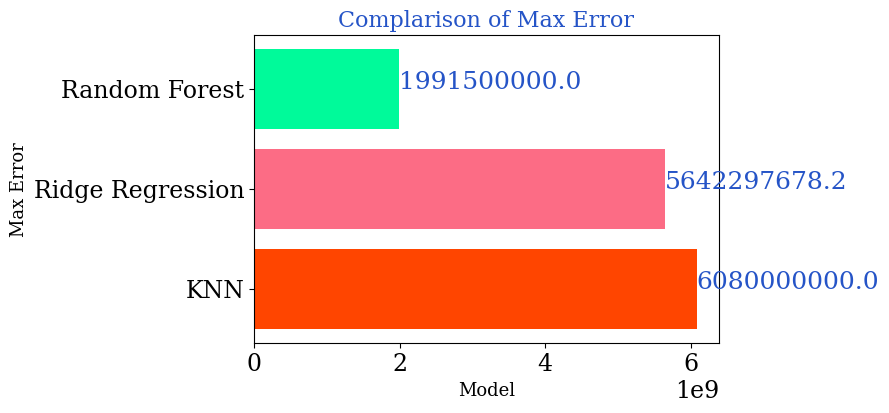

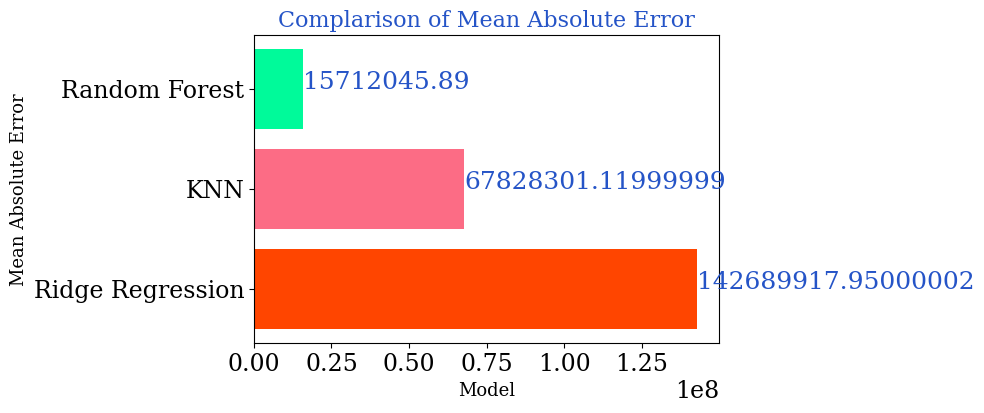

,Model,R2 Score(Test),R2 Score(Train),Mean Squared Error,Max Error,Mean Absolute Error
2,Ridge Regression,67.57,65.03,1.080608e+15,5.642298e+09,1.426899e+08
1,KNN,85.71,84.97,4.760892e+14,6.080000e+09,6.782830e+07
0,Random Forest,98.94,98.93,3.531849e+13,1.991500e+09,1.571205e+07


In [21]:
fdtr_X,fdts_X,fdtr_Y,fdts_Y=fdt_split(fdata_norm,fdata_preds)
ply_mdl=[
    pipeline.make_pipeline(preprocessing.StandardScaler(),ensemble.RandomForestRegressor()),
    pipeline.make_pipeline(preprocessing.StandardScaler(),neighbors.KNeighborsRegressor()),
    pipeline.make_pipeline(preprocessing.StandardScaler(),linear_model.Ridge())
]
ply_mdlnms=[
    "Random Forest",
    "KNN",
    "Ridge Regression"
]

r2vals_tst=[]
r2vals_training=[]
msevals_tst=[]
maxvals_tst=[]
maevals_tst=[]
for i in range(len(ply_mdl)):
    print("Executing: {}".format(ply_mdlnms[i]))
    outcome=Player_Value_Predict(ply_mdl[i], fdtr_X, fdts_X, fdtr_Y, fdts_Y, ply_mdlnms[i])
    r2vals_tst.append(outcome[0])
    r2vals_training.append(outcome[1])
    msevals_tst.append(outcome[2])
    maxvals_tst.append(outcome[3])
    maevals_tst.append(outcome[4])
    print("End of Execution for {}".format(ply_mdlnms[i]))

fd_met_res=pn.DataFrame({
    "Model":ply_mdlnms,
    "R2 Score(Test)":r2vals_tst,
    "R2 Score(Train)":r2vals_training,
    "Mean Squared Error":msevals_tst,
    "Max Error":maxvals_tst,
    "Mean Absolute Error":maevals_tst
})
plt_cols=fd_met_res.columns.tolist()[1:]
for i in plt_cols:
    fd_met_res=fd_met_res.sort_values(by=i,ascending=False)
    mpl.figure(figsize=(6,4))
    mpl.title("Complarison of {}".format(i),fontsize=16)
    mpl.barh(fd_met_res['Model'],fd_met_res[i],color=["#FF4500","#FC6C85","#00FA9A","#E2F516","#EB5406"])
    mpl.xlabel("Model",fontsize=13)
    mpl.ylabel("{}".format(i),fontsize=13)
    for fd_id, fd_val in enumerate(fd_met_res[i]):
        mpl.text(fd_val, fd_id, str(fd_val))
    mpl.show()
fd_met_res.to_csv("Result_metrics_Default.csv")
fd_met_res

In [22]:
fd_X=fdata_norm[fdata_preds]
fd_Y=fdata_norm['Value']

## Prediction

In [23]:
fd_met_res_sorted=fd_met_res.sort_values(by="R2 Score(Test)",ascending=False)

In [24]:
topmd = 'best_model.sav'
topmdl=ply_mdl[ply_mdlnms.index(fd_met_res_sorted['Model'].values.tolist()[0])]
pipeline.make_pipeline(preprocessing.StandardScaler(),topmdl).fit(fd_X, fd_Y)
pickle.dump(topmdl, open(topmd, 'wb'))
loadmdl=pickle.load(open(topmd, 'rb'))
mdlprdct=pipeline.make_pipeline(preprocessing.StandardScaler(),loadmdl)
mdlprdct.fit(fdtr_X, fdtr_Y)
mdlprdct

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('randomforestregressor',
                                  RandomForestRegressor())]))])

In [25]:
prd_fdata=pn.concat([fdata_cat,fdata_norm[fdata_preds]],axis=1)
prd_fdata.head(10)

,Name,Position,Club,Division,Based,Nation,Preferred Foot,Best Pos,Best Role,Age,...,OtB,L Th,Lon,Han,Fla,Fin,Dri,Cro,Cmp,Bal
0,Lionel Messi,"AM (RC), ST (C)",Barcelona,Spanish First Division,Spain (First Division),ARG,Left,AM (R),IF,0.514286,...,0.789474,0.157895,0.842105,0.055556,1.000000,1.000000,1.000000,0.736842,0.894737,0.947368
1,Cristiano Ronaldo,"AM (RL), ST (C)",Juventus,Italian Serie A,Italy (Serie A),POR,Either,ST (C),CF,0.571429,...,0.894737,0.105263,0.947368,0.111111,0.894737,0.947368,0.736842,0.736842,0.684211,0.684211
2,Kylian MbappÃ©,"AM (RL), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),FRA,Right,ST (C),AF,0.171429,...,0.894737,0.052632,0.578947,0.111111,0.894737,0.842105,0.894737,0.631579,0.894737,0.684211
3,Manuel Neuer,GK,FC Bayern,Bundesliga,Germany (Bundesliga),GER,Either,GK,SK,0.542857,...,0.000000,0.105263,0.105263,0.722222,0.263158,0.105263,0.105263,0.052632,1.000000,0.684211
4,Neymar,"M (L), AM (LC), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),BRA,Right,AM (L),IW,0.371429,...,0.894737,0.052632,0.736842,0.055556,1.000000,0.789474,1.000000,0.789474,0.842105,0.684211
5,Erling Haaland,ST (C),Borussia Dortmund,Bundesliga,Germany (Bundesliga),NOR,Left,ST (C),AF,0.114286,...,0.894737,0.210526,0.578947,0.166667,0.789474,0.894737,0.631579,0.421053,0.842105,0.842105
6,Kevin De Bruyne,"M (RLC), AM (C)",Man City,English Premier Division,England (Premier Division),BEL,Either,M (C),MEZ,0.371429,...,0.736842,0.368421,0.789474,0.055556,0.736842,0.789474,0.736842,0.947368,0.736842,0.684211
7,Luis SuÃ¡rez,"AM (RLC), ST (C)",A. Madrid,Spanish First Division,Spain (First Division),URU,Right,ST (C),DLF,0.514286,...,0.842105,0.368421,0.789474,0.111111,0.894737,0.894737,0.736842,0.736842,0.842105,0.578947
8,Gianluigi Buffon,GK,Juventus,Italian Serie A,Italy (Serie A),ITA,Right Only,GK,SK,0.771429,...,0.210526,0.000000,0.105263,0.722222,0.578947,0.105263,0.000000,0.000000,0.894737,0.631579
9,Gareth Bale,"M (L), AM (RLC), ST (C)",Tottenham,English Premier Division,England (Premier Division),WAL,Left,AM (L),W,0.428571,...,0.894737,0.736842,0.947368,0.055556,0.842105,0.842105,0.789474,0.789474,0.578947,0.631579


In [44]:
nmply=input("Enter Player Name: ")
nmply=nmply.strip()
plydtls=prd_fdata[prd_fdata['Name']==nmply].iloc[:,:9]
indx=plydtls.index.tolist()[0]
if len(plydtls)==1:
    plycts=plydtls.columns.tolist()
    plydtl=plydtls.values.tolist()[0]
    print("Details of Selected Players\n")
    for pl in range(len(plycts)):
        print("{}:  {}".format(plycts[pl],plydtl[pl]))
else:
    plydtls=plydtls.iloc[0]
    plycts=plydtls.index.tolist()
    plydtl=plydtls.tolist()
    print("Details of Selected Players\n")
    for pl in range(len(plycts)):
        print("{}:  {}".format(plycts[pl],plydtl[pl]))

Enter Player Name: Lionel Messi
Details of Selected Players

Name:  Lionel Messi
Position:  AM (RC), ST (C)
Club:  Barcelona
Division:  Spanish First Division
Based:  Spain (First Division)
Nation:  ARG
Preferred Foot:  Left
Best Pos:  AM (R)
Best Role:  IF


In [45]:
chrec=prd_fdata.iloc[indx]
chrec_prd=chrec.iloc[9:]
actval=fdata_norm['Value']
chrec_prd

Age     0.514286
Wage         1.0
CA           1.0
PA           1.0
Tea     0.684211
Str     0.421053
Sta     0.631579
Ref          0.0
Pen     0.842105
1v1     0.058824
OtB     0.789474
L Th    0.157895
Lon     0.842105
Han     0.055556
Fla          1.0
Fin          1.0
Dri          1.0
Cro     0.736842
Cmp     0.894737
Bal     0.947368
Name: 0, dtype: object

In [46]:
prdply=mdlprdct.predict([chrec_prd])[0]
print("Predicted Value of {} is {}".format(nmply,prdply))
print("Actual Enlisted Values for {} is {}".format(nmply,fdata_norm['Value'][indx]))
print("Difference Between Actual and Predicted: {}".format(prdply-fdata_norm['Value'][indx]))

Predicted Value of Lionel Messi is 72405000.0
Actual Enlisted Values for Lionel Messi is 73000000
Difference Between Actual and Predicted: -595000.0
